In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Password_strength/passwords.csv')
#dataset link-https://www.kaggle.com/datasets/utkarshx27/passwords

In [4]:
df.columns

Index(['rank', 'password', 'category', 'value', 'time_unit',
       'offline_crack_sec', 'rank_alt', 'strength', 'font_size'],
      dtype='object')

In [5]:
df.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


In [7]:
df.isnull().sum() #checking for nan values

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [9]:
df.dropna(how='any',inplace=True) #deleting rows with nan

In [10]:
df.isnull().sum()

rank                 0
password             0
category             0
value                0
time_unit            0
offline_crack_sec    0
rank_alt             0
strength             0
font_size            0
dtype: int64

In [12]:
df_alt=df[['rank', 'password', 'category', 'value', 'time_unit','strength']] #selecting some important columns for analysing

In [13]:
for col in df_alt.columns:
  print(df_alt[col].value_counts())

1.0      1
330.0    1
343.0    1
342.0    1
341.0    1
        ..
162.0    1
161.0    1
160.0    1
159.0    1
500.0    1
Name: rank, Length: 500, dtype: int64
password    1
tester      1
scott       1
sydney      1
skippy      1
           ..
miller      1
lakers      1
spider      1
monster     1
passw0rd    1
Name: password, Length: 500, dtype: int64
name                   183
cool-macho              79
simple-alphanumeric     61
fluffy                  44
sport                   37
nerdy-pop               30
animal                  29
password-related        15
food                    11
rebellious-rude         11
Name: category, dtype: int64
3.72     233
3.19      87
6.91      56
3.43      39
7.92      31
18.52     18
11.11     11
1.29       5
2.56       5
3.70       4
92.27      4
3.09       3
1.85       2
1.84       1
17.28      1
Name: value, dtype: int64
days       238
months      87
years       65
minutes     51
hours       43
seconds     11
weeks        5
Name: time_unit, dty

In [14]:
df.dtypes

rank                 float64
password              object
category              object
value                float64
time_unit             object
offline_crack_sec    float64
rank_alt             float64
strength             float64
font_size            float64
dtype: object

rank-popularity in their database of released password

Strength - quality of password where 10 is highest, 1 is lowest, please note that these are relative to these generally bad passwords

##Lets find out popularity of passwords on the basis of strength
#Observation:
1. Strength=28.0 for the most popular password

  
2.password is 'passw0rd'

In [22]:
df.strength.unique()

array([ 8.,  4.,  7.,  1., 32.,  9.,  0., 10., 25.,  6.,  3.,  5., 46.,
        2., 19., 38., 48., 35., 36., 34., 21., 28.])

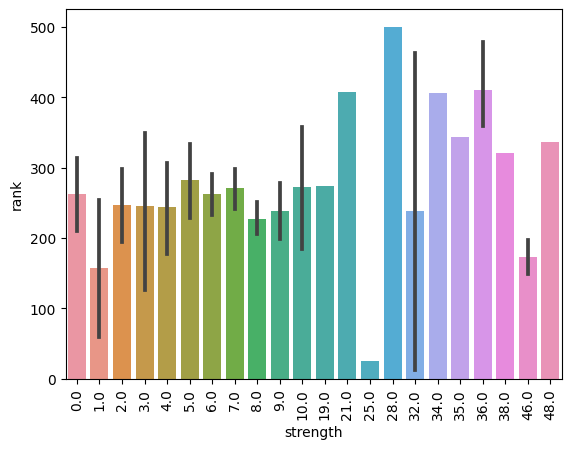

In [25]:
sns.barplot(data=df, x='strength', y='rank')
plt.xticks(x='strength', rotation='vertical')
plt.show()

In [26]:
df[df['strength']==28.0] #most popular

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
499,500.0,passw0rd,password-related,92.27,years,29.02,502.0,28.0,21.0


##Top 10 passwords

In [50]:
df[df['rank']>=490]['password']

489      888888
490     natasha
491      sniper
492      chance
493     genesis
494      hotrod
495      reddog
496    alexande
497     college
498      jester
499    passw0rd
Name: password, dtype: object

##Share of different password category in the dataset
#Observation:Name kind of passwords has the highest share

In [37]:
g=df.groupby('category')
label=[i for i,d in g]
label

['animal',
 'cool-macho',
 'fluffy',
 'food',
 'name',
 'nerdy-pop',
 'password-related',
 'rebellious-rude',
 'simple-alphanumeric',
 'sport']

In [49]:
count=[i for i in g.count()['rank']]
count
print(g.count()['rank'])

category
animal                  29
cool-macho              79
fluffy                  44
food                    11
name                   183
nerdy-pop               30
password-related        15
rebellious-rude         11
simple-alphanumeric     61
sport                   37
Name: rank, dtype: int64


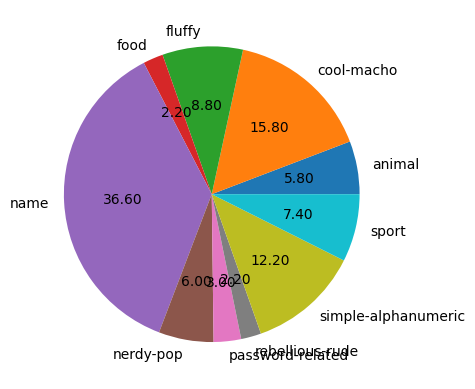

In [48]:
plt.pie(count,labels=label,autopct='%0.2f')
plt.show()

In [52]:
df[df['category']=='name']['password']

14      michael
17     jennifer
20       jordan
21     superman
28       thomas
         ...   
488      cassie
490     natasha
492      chance
496    alexande
498      jester
Name: password, Length: 183, dtype: object

Let us find out relation between offline crack time and online

#Observation :Password which took years to crack are mainly of name type hence offline crack time is very less

In [55]:
df_new=df[df['time_unit']=='years']
df_new['category'].value_counts()

name                   22
cool-macho             12
nerdy-pop               7
sport                   6
simple-alphanumeric     6
password-related        3
fluffy                  3
animal                  3
rebellious-rude         2
food                    1
Name: category, dtype: int64

In [61]:
g=df_new.groupby('category').mean()

<ipython-input-61-b023f36f9edf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g=df_new.groupby('category').mean()


In [63]:
g['offline_crack_sec']

category
animal                  2.170000
cool-macho              2.170000
fluffy                  2.170000
food                    2.170000
name                    2.170000
nerdy-pop               5.421143
password-related       11.120000
rebellious-rude         2.170000
simple-alphanumeric     6.190333
sport                   6.686667
Name: offline_crack_sec, dtype: float64

font_size	Used to create the graphic for KIB
##Observation:On average 'nerdy-pop' type of passwords has highest font_size

In [66]:
g1=df_new.groupby('category').mean()
labels=[i for i,df in df_new.groupby('category') ]
count=[i for i in g1['font_size']]

<ipython-input-66-210ba30ab424>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g1=df_new.groupby('category').mean()


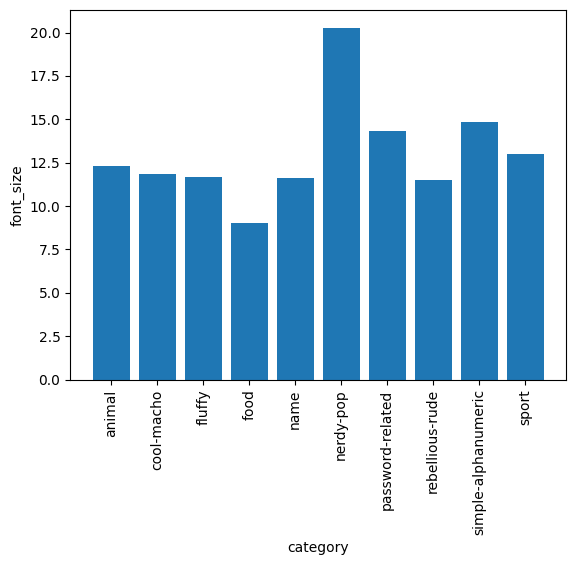

In [70]:
plt.bar(labels,count)
plt.xticks(x=labels, rotation='vertical')
plt.xlabel('category')
plt.ylabel('font_size')
plt.show()